# **Analisis klaster pelanggan toko online**


### **Businnes Understanding**
Menggunakan algoritma K-means dan metodologi CRISP-DM untuk mengklaster pelanggan berdasarkan perilaku pembelian

### **Data Understanding**


In [44]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [45]:
# hubungkan ke gdrive
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# membaca file dataset
file_path = f'{path}/My Drive/data mining tb/customer_shopping_data.csv'
df = pd.read_csv(file_path)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### **Data Preparation**

In [47]:
# mencari apakah ada data null/NaN
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [48]:
# Menghitung jumlah transaksi unik per pelanggan
frequences = df.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Mengganti nama kolom untuk kejelasan
frequences.columns = ['customer_id', 'frequency']

frequences

,customer_id,frequency
0,C100004,1
1,C100005,1
2,C100006,1
3,C100012,1
4,C100019,1
...,...,...
99452,C999886,1
99453,C999910,1
99454,C999974,1
99455,C999976,1


In [49]:
# Menggabungkan frekuensi pembelian dengan data asli
df_new = pd.merge(df, frequences, on='customer_id', how='left')
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [50]:
# Menyimpan dataset yang telah digabungkan
file_path = f'{path}/My Drive/data mining tb/customer_shopping_data_new.csv'
df_new.to_csv(file_path, index=False)

In [51]:
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [52]:
# Membuat kolom total_price
df_new['total_price'] = df_new['quantity'] * df_new['price']
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1,16800.00


In [53]:
# Menyimpan dataset yang telah digabungkan
df_new.to_csv(file_path, index=False)

In [54]:
# drop kolom yang tidak digunakan
column = ['shopping_mall']
df_new = df_new.drop(column, axis = 1)
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,1,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,1,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,1,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,1,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,1,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,1,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,1,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,1,16800.00


In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   frequency       99457 non-null  int64  
 10  total_price     99457 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.3+ MB


In [56]:
df_new.describe()

,age,quantity,price,frequency,total_price
count,99457.000000,99457.000000,99457.000000,99457.0,99457.000000
mean,43.427089,3.003429,689.256321,1.0,2528.789268
std,14.990054,1.413025,941.184567,0.0,4222.475781
min,18.000000,1.000000,5.230000,1.0,5.230000
25%,30.000000,2.000000,45.450000,1.0,136.350000
50%,43.000000,3.000000,203.300000,1.0,600.170000
75%,56.000000,4.000000,1200.320000,1.0,2700.720000
max,69.000000,5.000000,5250.000000,1.0,26250.000000


In [57]:
grouped = df_new.groupby('category').size().reset_index(name='count')
duplicate_ids = grouped[grouped['count'] > 1]
duplicate_ids

,category,count
0,Books,4981
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
7,Toys,10087


In [58]:
# Mengonversi gender menjadi numerik
Gender = df_new['gender'].value_counts().reset_index()
Gender

,gender,count
0,Female,59482
1,Male,39975


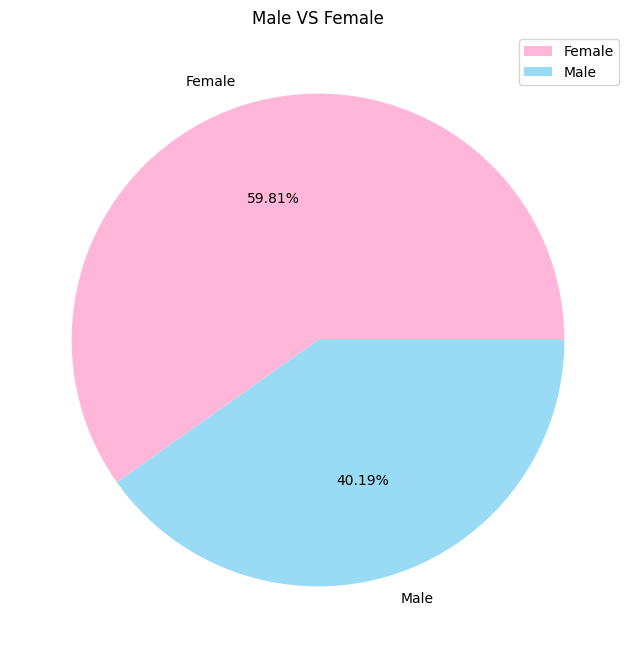

In [59]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'],
        labels=Gender['gender'],autopct='%1.2f%%',
        colors=["#FFB6D9", "#99DBF5"]
       )
plt.title('Male VS Female')
plt.legend()
plt.show()

In [60]:
Category = df_new['category'].value_counts()
Category

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

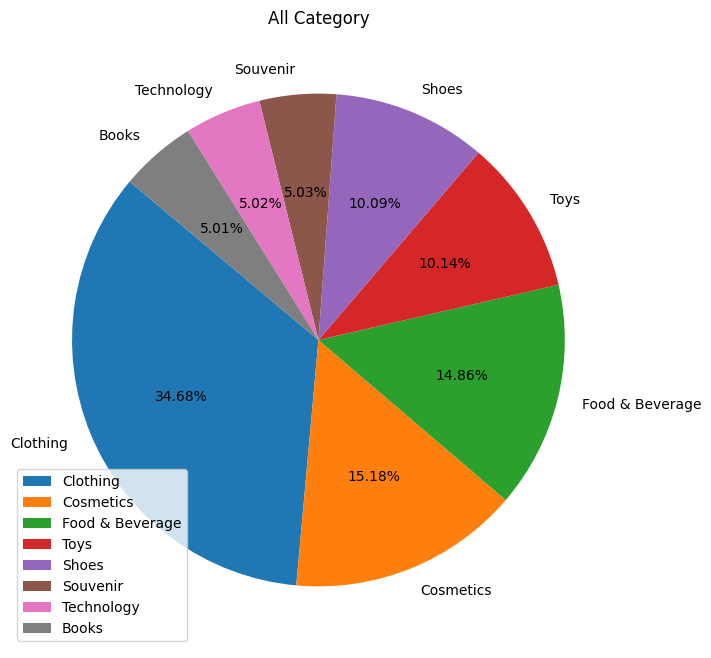

In [61]:
plt.figure(figsize=(8,8))
plt.pie(Category,
        labels=Category.index,autopct='%1.2f%%',
        startangle=140
       )
plt.title('All Category')
plt.legend()
plt.show()

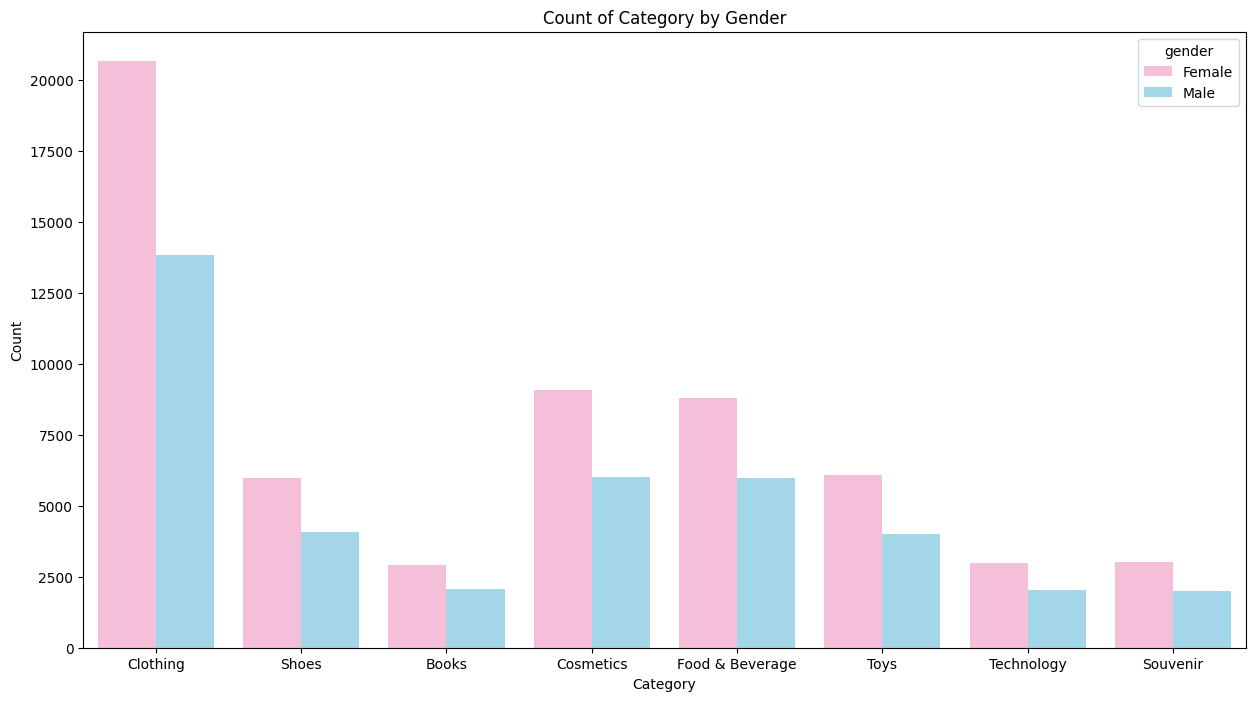

In [62]:
plt.figure(figsize=(15, 8))
sn.countplot(data=df_new, x=df_new['category'], hue=df_new['gender'],palette=["#FFB6D9", "#99DBF5"])
plt.title('Count of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [63]:
Age = df_new.groupby(['age', 'gender']).size().reset_index(name='count')
Age

,age,gender,count
0,18,Female,1079
1,18,Male,765
2,19,Female,1133
3,19,Male,803
4,20,Female,1102
...,...,...,...
99,67,Male,766
100,68,Female,1148
101,68,Male,745
102,69,Female,1143


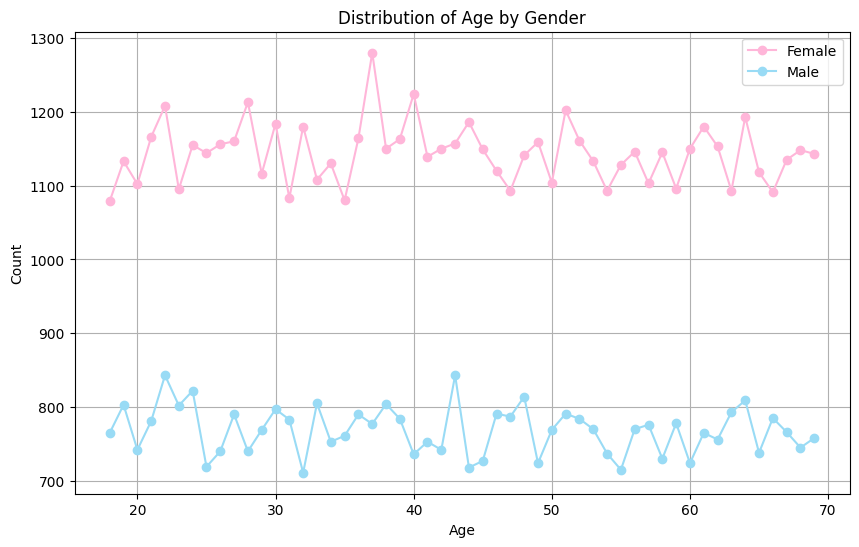

In [64]:
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan gender
for gender, color in zip(df_new['gender'].unique(), ["#FFB6D9", "#99DBF5"]):
    plt.plot('age', 'count', data=Age[Age['gender']==gender], marker='o', color=color, label=gender)

# Menambahkan judul dan label
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [68]:
count_category = df_new.groupby(['category', 'gender']).size().reset_index(name='count').sort_values(by='count', ascending=False)
count_category

,category,gender,count
2,Clothing,Female,20652
3,Clothing,Male,13835
4,Cosmetics,Female,9070
6,Food & Beverage,Female,8804
14,Toys,Female,6085
5,Cosmetics,Male,6027
7,Food & Beverage,Male,5972
8,Shoes,Female,5967
9,Shoes,Male,4067
15,Toys,Male,4002


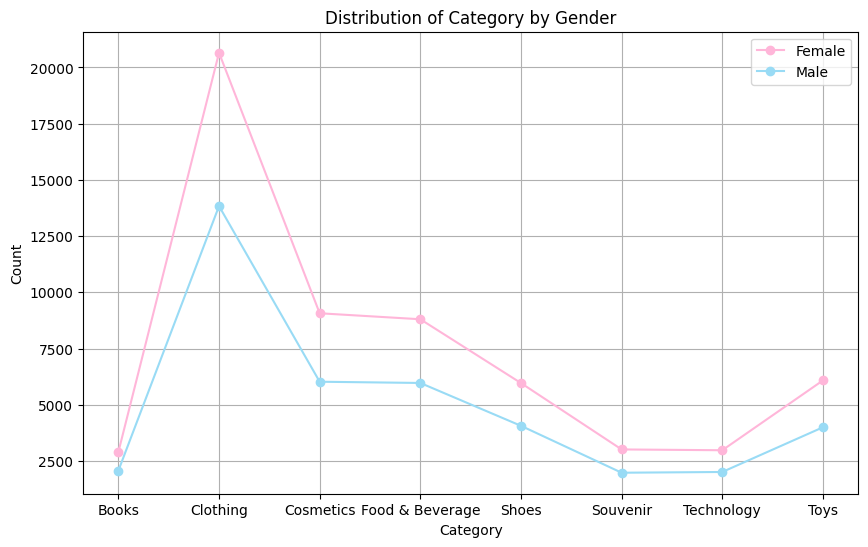

In [66]:
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan gender
for gender, color in zip(df_new['gender'].unique(), ["#FFB6D9", "#99DBF5"]):
    plt.plot('category', 'count', data=count_category[count_category['gender']==gender], marker='o', color=color, label=gender)

# Menambahkan judul dan label
plt.title('Distribution of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

### **Modeling**